In [2]:
pip install scikit-learn


In [3]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load Titanic dataset
df = sns.load_dataset('titanic')

# Drop rows with missing values
df = df.dropna(subset=['age', 'embarked'])

# Convert categorical features to numerical
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Define features and target
X = df[[ 'sex', 'age', 'pclass', 'embarked']]
y = df['survived']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
model = DecisionTreeClassifier(criterion='entropy', random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [6]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7622377622377622
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.90      0.81        80
           1       0.82      0.59      0.69        63

    accuracy                           0.76       143
   macro avg       0.78      0.74      0.75       143
weighted avg       0.77      0.76      0.75       143



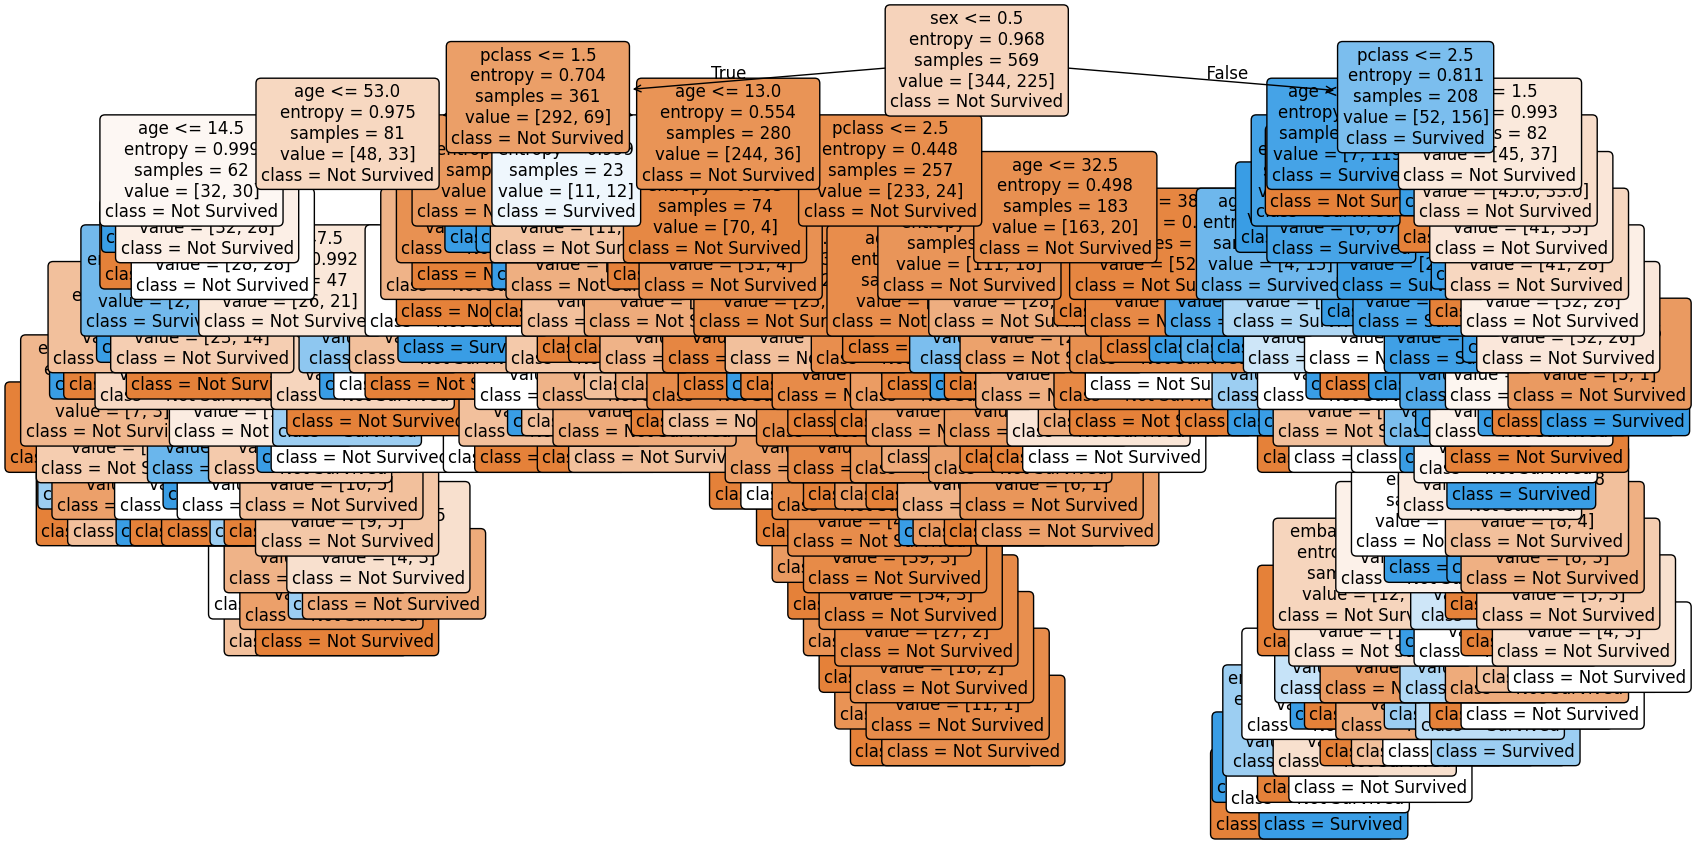

In [8]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Make the figure big for clarity
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()
